# Part II - Ford GoBike System Data Analysis Explained
## by Sandra Barasa

## Investigation Overview

This project is centred on information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In my analysis, I investigated features that had an impact on the cycling duration of members, focusing mainly on user type, members' age, members' gender, start day and bike-share-for-all-trip.

## Dataset Overview

The data set included approximately 183,000 members, with data showing:
* Duration of the trip in seconds.
* Start and end time of the trips.
* Start and end-station names, IDs, latitudes and longitudes.
* Bike IDs.
* User Type ie Subscriber or Customer.
* Members' birth year and gender.
* Whether the bike was used for the whole trip or not.

After the preliminary wrangling, about 8400 data points were excluded in the analysis due to missing data.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df1 = pd.read_csv('fordbike_master.csv')
print(df1.shape)
df1.head()

(174952, 19)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,member_age,age_group
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,Thursday,38,31 - 40
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,Thursday,50,41 - 50
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,Thursday,33,31 - 40
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,Thursday,48,41 - 50
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,Thursday,63,61+


## Distribution of Gender

There are generally more males than females and 'other' genders, with males accounting for about 74.5% of the data.

In [3]:
print(df1['member_gender'].value_counts())
print(df1['user_type'].value_counts())

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64
Subscriber    158386
Customer       16566
Name: user_type, dtype: int64


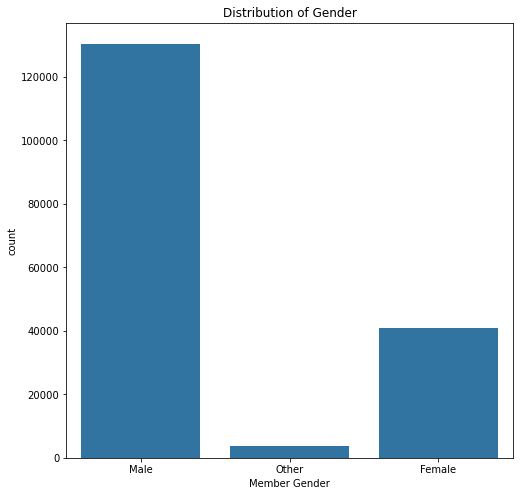

In [4]:
#Distribution of Gender
plt.figure(figsize=[8, 8]);
base_color = sns.color_palette()[0]
sns.countplot(data = df1, x = 'member_gender', color = base_color);
plt.title('Distribution of Gender');
plt.xlabel('Member Gender');

## Relationship Between Duration of Trips and Gender Plotted Against Start Day of the Week
'Other' gender-category rode the bikes for longer durations than females and males, despite being the minority. The opposite is true for the males. i.e. Despite showing significantly high numbers, they on average rode for the shortest duration of time.

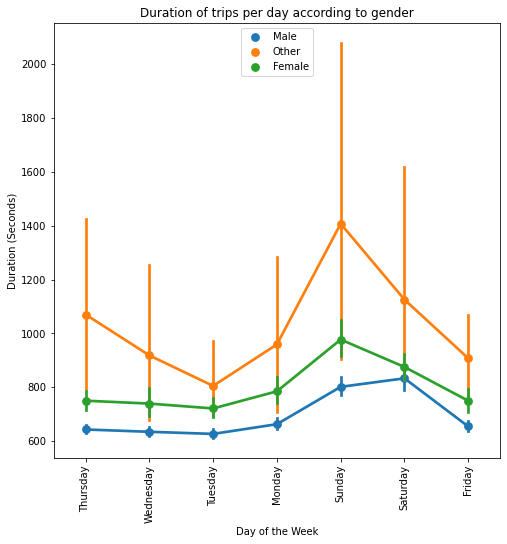

In [5]:
plt.figure(figsize=[8, 8]);
sns.pointplot(data = df1, x = 'start_day', y = 'duration_sec', hue = 'member_gender')

plt.title('Duration of trips per day according to gender')
plt.xlabel('Day of the Week')
plt.xticks(rotation = 90)
plt.ylabel('Duration (Seconds)')
plt.legend(loc = 9);

## Distribution of  User Type
There are more subscribers than there are customers, with subscribers accounting for 90.5% of the data.

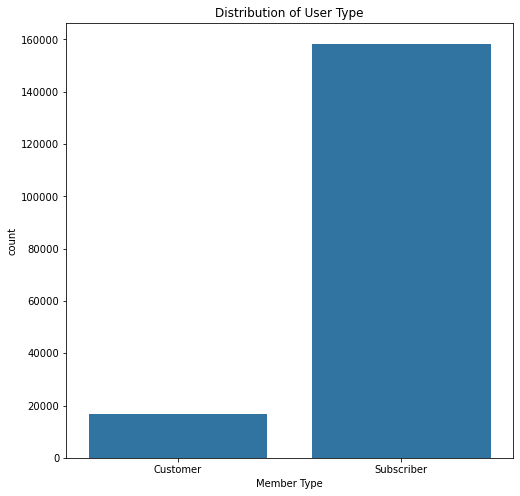

In [6]:
#Distribution of User Type
plt.figure(figsize=[8, 8]);
base_color = sns.color_palette()[0]
sns.countplot(data = df1, x = 'user_type', color = base_color);
plt.title('Distribution of User Type');
plt.xlabel('Member Type');

## Relationship Between Duration of Trips and User Type Plotted Against Start Day of the Week

Despite subscribers being more than customers in our data, the plot shows that customers actually ride for longer periods of time than the subscribers.

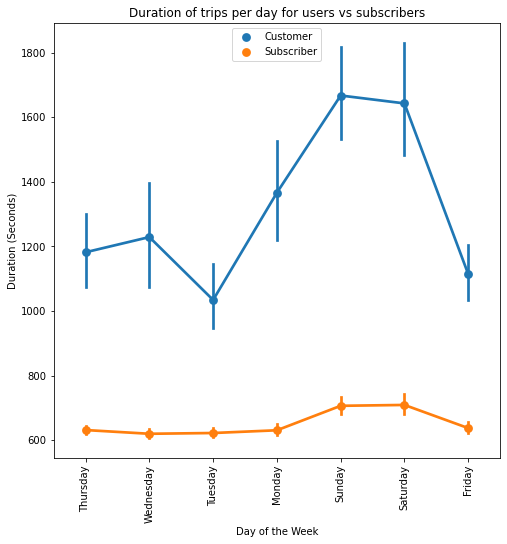

In [7]:
plt.figure(figsize=[8, 8]);
sns.pointplot(data = df1, x = 'start_day', y = 'duration_sec', hue = 'user_type')

plt.title('Duration of trips per day for users vs subscribers')
plt.xlabel('Day of the Week')
plt.xticks(rotation = 90)
plt.ylabel('Duration (Seconds)')
plt.legend(loc = 9);

## Relationship Between Duration of Trips and Age Group Plotted Against Gender
The age groups with the most active bike riders are as below:
* Male: 41 - 50 years
* Female: 51 - 60 years
* Other: 31 - 40 years

<Figure size 576x576 with 0 Axes>

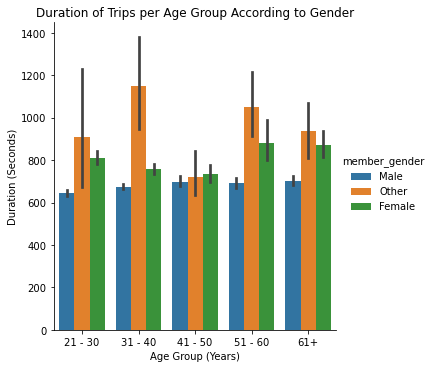

In [8]:
#Grouping the ages
df1['age_group'] = df1['member_age'].apply(lambda x: '21 - 30' if 20<x<=30
                                                  else '31 - 40' if 30<x<=40
                                                  else '41 - 50' if 40<x<=50
                                                  else '51 - 60' if 50<x<=60
                                                  else '61+' if 60<=x
                                                       else x)
df1.age_group.value_counts()

#Creating an ordered sequence for the age groups before plotting
ag = ['21 - 30', '31 - 40', '41 - 50', '51 - 60', '61+' ]
age_group_order = pd.api.types.CategoricalDtype(ordered = True, categories = ag)
df1['age_group'] = df1['age_group'].astype(age_group_order)

#Plotting the graph
plt.figure(figsize=[8, 8]);
sns.catplot(data = df1, x='age_group', y='duration_sec', hue='member_gender', kind = 'bar');
plt.title('Duration of Trips per Age Group According to Gender');
plt.xlabel('Age Group (Years)');
plt.ylabel('Duration (Seconds)');

In [9]:
!jupyter nbconvert Part_II_FordGoBike_Slide_Deck.ipynb --to slides --post serve --no-input --no-prompt

^C
